In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)

In [4]:
df=pd.read_csv('Rainfall_Prediction.csv')
df.head(8)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No


Here we have to predict the churn rate which are having values of Yes and No. So, here we need to use the logistic and classifiers models to predict our result.

In [5]:
df.shape

(8425, 23)

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Lot of object columns are present, we need to convert them later into numerical data.

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

<AxesSubplot:>

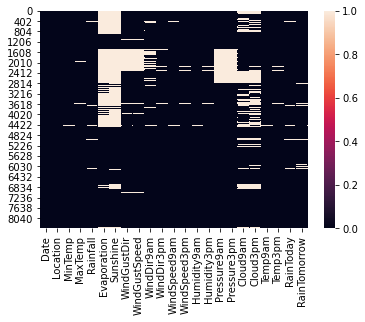

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [13]:
df = df.drop(df[df['RainTomorrow'].isnull()].index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8186 entries, 0 to 8423
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8186 non-null   object 
 1   Location       8186 non-null   object 
 2   MinTemp        8126 non-null   float64
 3   MaxTemp        8151 non-null   float64
 4   Rainfall       8079 non-null   float64
 5   Evaporation    4767 non-null   float64
 6   Sunshine       4306 non-null   float64
 7   WindGustDir    7233 non-null   object 
 8   WindGustSpeed  7233 non-null   float64
 9   WindDir9am     7377 non-null   object 
 10  WindDir3pm     7900 non-null   object 
 11  WindSpeed9am   8124 non-null   float64
 12  WindSpeed3pm   8100 non-null   float64
 13  Humidity9am    8142 non-null   float64
 14  Humidity3pm    8103 non-null   float64
 15  Pressure9am    6894 non-null   float64
 16  Pressure3pm    6893 non-null   float64
 17  Cloud9am       5895 non-null   float64
 18  Cloud3pm

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

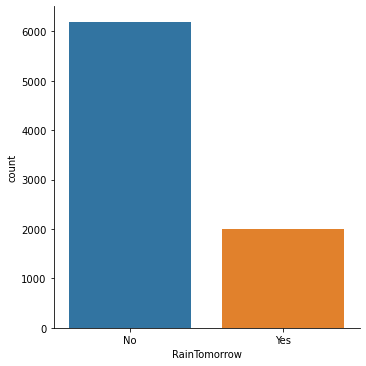

In [16]:
sns.catplot(x = 'RainTomorrow', kind = 'count', data = df)

In [17]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

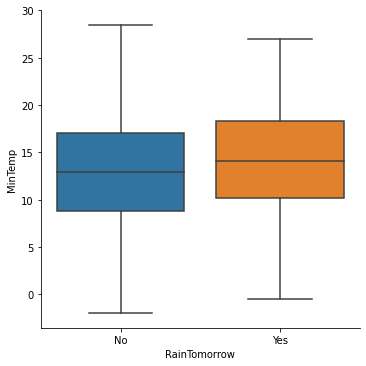

In [20]:
sns.catplot(x = 'RainTomorrow', y="MinTemp", kind="box", data = df)

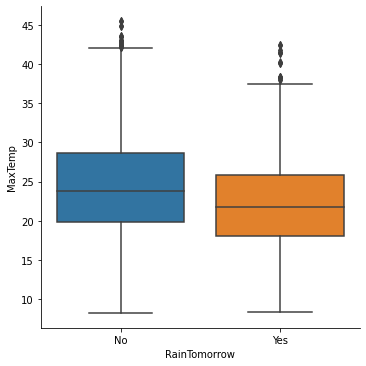

In [21]:
sns.catplot(x = 'RainTomorrow', y="MaxTemp", kind="box", data = df)

In [22]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [23]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])
df['RainTomorrow']=df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

In [24]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

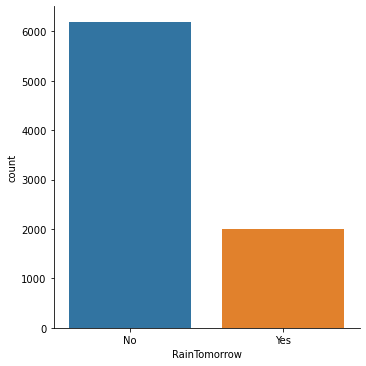

In [25]:
sns.catplot(x = 'RainTomorrow', kind = 'count', data = df)

In [26]:
df['RainTomorrow'].value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [29]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [31]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [32]:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.411852,7.689782,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.483177,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.411852,7.689782,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,4.528075,4.483177,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.411852,7.689782,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,4.528075,2.000000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.411852,7.689782,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,4.528075,4.483177,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.411852,7.689782,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,5


In [33]:
categorical_data = df.select_dtypes(include=['object'])
print(categorical_data.columns)

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [35]:
df.skew()

Location         -0.048025
MinTemp          -0.073106
MaxTemp           0.391990
Rainfall         13.160015
Evaporation      14.083801
Sunshine         -0.747040
WindGustDir       0.121899
WindGustSpeed     0.745743
WindDir9am        0.171192
WindDir3pm       -0.115663
WindSpeed9am      0.940199
WindSpeed3pm      0.504880
Humidity9am      -0.254517
Humidity3pm       0.120126
Pressure9am      -0.032475
Pressure3pm      -0.015923
Cloud9am         -0.339559
Cloud3pm         -0.262710
Temp9am          -0.008452
Temp3pm           0.404300
RainToday         1.222214
RainTomorrow      1.197253
Year              0.425109
Month             0.049976
Day               0.000784
dtype: float64

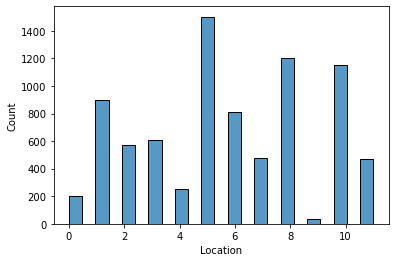

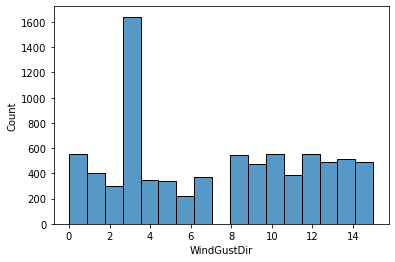

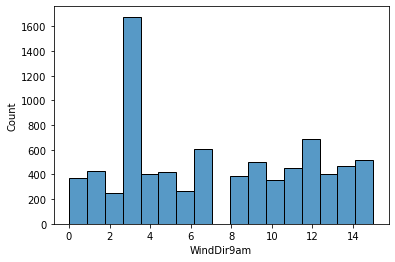

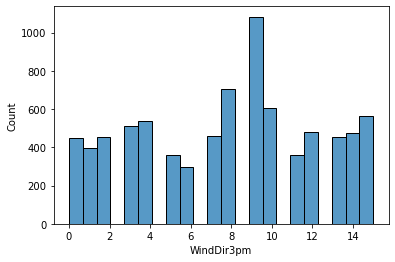

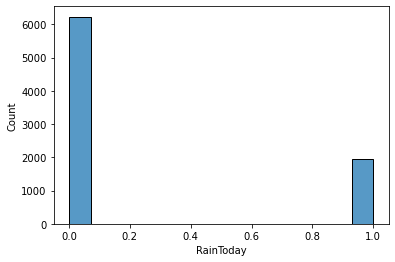

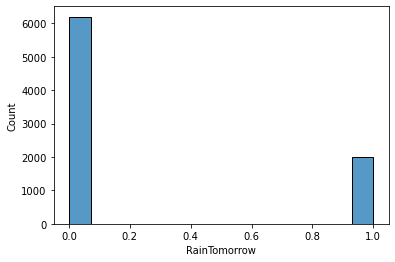

In [36]:
for i in categorical_data:
  sns.histplot(df[i])
  plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,1,13.4,22.9,0.6,5.411852,7.689782,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.483177,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,5.411852,7.689782,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.528075,4.483177,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,5.411852,7.689782,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.528075,2.000000,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,5.411852,7.689782,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.528075,4.483177,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,5.411852,7.689782,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,3.5,21.8,0.0,5.411852,7.689782,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.528075,4.483177,9.4,20.9,0,0,2017,6,20
8420,9,2.8,23.4,0.0,5.411852,7.689782,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.528075,4.483177,10.1,22.4,0,0,2017,6,21
8421,9,3.6,25.3,0.0,5.411852,7.689782,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.528075,4.483177,10.9,24.5,0,0,2017,6,22
8422,9,5.4,26.9,0.0,5.411852,7.689782,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.528075,4.483177,12.5,26.1,0,0,2017,6,23


In [37]:
a=df.pop('RainTomorrow')

In [39]:
df.insert(24, 'RainTomorrow', a)

In [41]:
df.head(4)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainTomorrow
0,1,13.4,22.9,0.6,5.411852,7.689782,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.483177,16.9,21.8,0,2008,12,1,0
1,1,7.4,25.1,0.0,5.411852,7.689782,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.528075,4.483177,17.2,24.3,0,2008,12,2,0
2,1,12.9,25.7,0.0,5.411852,7.689782,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.528075,2.000000,21.0,23.2,0,2008,12,3,0
3,1,9.2,28.0,0.0,5.411852,7.689782,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.528075,4.483177,18.1,26.5,0,2008,12,4,0


In [42]:
x=df.iloc[:,0:-1]
x

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day
0,1,13.4,22.9,0.6,5.411852,7.689782,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.483177,16.9,21.8,0,2008,12,1
1,1,7.4,25.1,0.0,5.411852,7.689782,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.528075,4.483177,17.2,24.3,0,2008,12,2
2,1,12.9,25.7,0.0,5.411852,7.689782,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.528075,2.000000,21.0,23.2,0,2008,12,3
3,1,9.2,28.0,0.0,5.411852,7.689782,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.528075,4.483177,18.1,26.5,0,2008,12,4
4,1,17.5,32.3,1.0,5.411852,7.689782,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,3.5,21.8,0.0,5.411852,7.689782,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.528075,4.483177,9.4,20.9,0,2017,6,20
8420,9,2.8,23.4,0.0,5.411852,7.689782,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.528075,4.483177,10.1,22.4,0,2017,6,21
8421,9,3.6,25.3,0.0,5.411852,7.689782,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.528075,4.483177,10.9,24.5,0,2017,6,22
8422,9,5.4,26.9,0.0,5.411852,7.689782,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.528075,4.483177,12.5,26.1,0,2017,6,23


In [43]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 8186, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [46]:
y.value_counts()

0    6195
1    6195
Name: RainTomorrow, dtype: int64

Location            AxesSubplot(0.125,0.772143;0.110714x0.107857)
MinTemp          AxesSubplot(0.257857,0.772143;0.110714x0.107857)
MaxTemp          AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Rainfall         AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Evaporation      AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Sunshine         AxesSubplot(0.789286,0.772143;0.110714x0.107857)
WindGustDir         AxesSubplot(0.125,0.642714;0.110714x0.107857)
WindGustSpeed    AxesSubplot(0.257857,0.642714;0.110714x0.107857)
WindDir9am       AxesSubplot(0.390714,0.642714;0.110714x0.107857)
WindDir3pm       AxesSubplot(0.523571,0.642714;0.110714x0.107857)
WindSpeed9am     AxesSubplot(0.656429,0.642714;0.110714x0.107857)
WindSpeed3pm     AxesSubplot(0.789286,0.642714;0.110714x0.107857)
Humidity9am         AxesSubplot(0.125,0.513286;0.110714x0.107857)
Humidity3pm      AxesSubplot(0.257857,0.513286;0.110714x0.107857)
Pressure9am      AxesSubplot(0.390714,0.513286;0.110714x0.107857)
Pressure3p

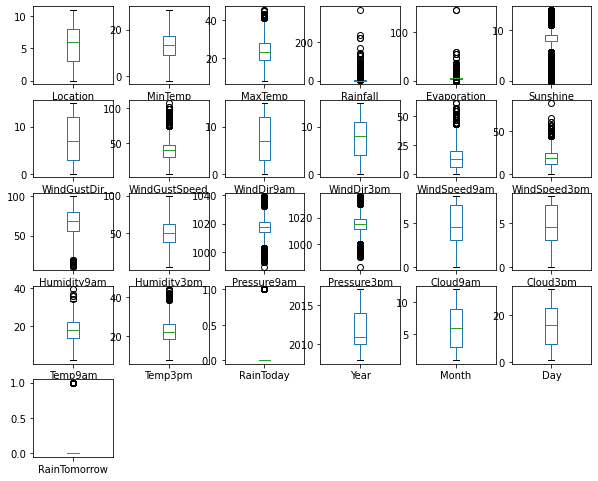

In [47]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,10))

Removing Outliers using Zscore

In [48]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z

array([[1.50555143, 0.04651884, 0.15433913, ..., 1.6436037 , 1.67858791,
        0.56691112],
       [1.50555143, 1.06457346, 0.20598376, ..., 1.6436037 , 1.56483574,
        0.56691112],
       [1.50555143, 0.04607218, 0.30425364, ..., 1.6436037 , 1.45108358,
        0.56691112],
       ...,
       [1.01846239, 1.76826525, 0.23874038, ..., 0.11496812, 0.71020762,
        0.56691112],
       [1.01846239, 1.43493756, 0.50079339, ..., 0.11496812, 0.82395979,
        0.56691112],
       [1.01846239, 0.99050064, 0.5171717 , ..., 0.11496812, 0.93771195,
        0.56691112]])

In [49]:
threshold=3
print(np.where(z>3))

(array([  12,   12,   43,   43,   51,   51,   59,   59,   60,   60,   61,
         61,   61,   66,   66,   67,   67,  122,  266,  294,  379,  379,
        403,  403,  404,  404,  405,  405,  429,  455,  555,  560,  560,
        561,  594,  674,  674,  690,  704,  739,  739,  761,  787,  788,
        793,  925,  939,  969,  970,  970,  970,  998,  999, 1001, 1128,
       1138, 1139, 1141, 1179, 1192, 1193, 1227, 1231, 1254, 1255, 1347,
       1401, 1402, 1403, 1469, 1470, 1471, 1503, 1525, 1577, 1634, 1651,
       1655, 1663, 1670, 1764, 1802, 1856, 1881, 1886, 1928, 1999, 2011,
       2026, 2056, 2090, 2098, 2164, 2177, 2195, 2195, 2206, 2207, 2241,
       2405, 2463, 2475, 2501, 2501, 2515, 2567, 2650, 2651, 2708, 2798,
       2806, 2815, 2815, 2821, 2825, 2829, 2835, 2843, 2849, 2856, 2857,
       2863, 2864, 2866, 2867, 2871, 2875, 2877, 2885, 2891, 2899, 2905,
       2913, 2919, 2927, 2933, 2938, 2952, 2966, 3012, 3012, 3019, 3020,
       3020, 3021, 3027, 3028, 3028, 3028, 3029, 3

In [50]:
df_new=df[(z<3).all(axis=1)]

In [51]:
df_new.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainTomorrow
0,1,13.4,22.9,0.6,5.411852,7.689782,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.483177,16.9,21.8,0,2008,12,1,0
1,1,7.4,25.1,0.0,5.411852,7.689782,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.528075,4.483177,17.2,24.3,0,2008,12,2,0
2,1,12.9,25.7,0.0,5.411852,7.689782,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.528075,2.000000,21.0,23.2,0,2008,12,3,0
3,1,9.2,28.0,0.0,5.411852,7.689782,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.528075,4.483177,18.1,26.5,0,2008,12,4,0
4,1,17.5,32.3,1.0,5.411852,7.689782,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,2008,12,5,0


In [52]:
df_new.shape

(7764, 25)

In [53]:
df=df_new

In [54]:
from sklearn.preprocessing import power_transform

In [55]:
x=power_transform(x,method='yeo-johnson')
x

array([[-1.61405959e+00, -7.07711014e-03,  3.27541629e-02, ...,
        -1.43718371e-13,  1.62053824e+00, -1.91642239e+00],
       [-1.61405959e+00, -1.15326510e+00,  3.93904738e-01, ...,
        -1.43718371e-13,  1.62053824e+00, -1.72732938e+00],
       [-1.61405959e+00, -1.02586176e-01,  4.88402177e-01, ...,
        -1.43718371e-13,  1.62053824e+00, -1.55541944e+00],
       ...,
       [-1.22973930e+00,  1.18171735e+00,  9.67798460e-01, ...,
        -3.49165141e-14, -6.46027949e-01, -2.09252110e-01],
       [-8.68495059e-01,  1.99761670e+00,  1.67256173e+00, ...,
        -3.49165141e-14, -9.89574698e-01, -8.26610118e-01],
       [-1.90908577e-01,  5.28822296e-01, -3.33566328e-01, ...,
        -1.07358566e-13, -6.46027949e-01, -1.39525215e+00]])

Scaling of the data

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.61405959, -0.00707711,  0.03275416, ..., -1.65039405,
         1.62053824, -1.91642239],
       [-1.61405959, -1.1532651 ,  0.39390474, ..., -1.65039405,
         1.62053824, -1.72732938],
       [-1.61405959, -0.10258618,  0.48840218, ..., -1.65039405,
         1.62053824, -1.55541944],
       ...,
       [-1.2297393 ,  1.18171735,  0.96779846, ..., -0.40092627,
        -0.64602795, -0.20925211],
       [-0.86849506,  1.9976167 ,  1.67256173, ..., -0.40092627,
        -0.9895747 , -0.82661012],
       [-0.19090858,  0.5288223 , -0.33356633, ..., -1.23284232,
        -0.64602795, -1.39525215]])

In [58]:
df.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainTomorrow
Location,1.000000,0.108961,0.054116,0.019286,0.133805,0.049281,-0.037437,0.247236,-0.044632,-0.027186,0.242472,0.231387,0.001367,0.061212,-0.016580,-0.002558,0.036050,0.026755,0.109508,0.051135,0.007287,0.473695,-0.104715,-0.004399,0.013752
MinTemp,0.108961,1.000000,0.718562,0.093899,0.369450,0.062499,-0.156779,0.229636,-0.046096,-0.154904,0.145467,0.186095,-0.129075,0.092800,-0.432862,-0.426530,0.088693,0.038319,0.889219,0.687606,0.067324,0.027828,-0.262964,0.008511,0.097017
MaxTemp,0.054116,0.718562,1.000000,-0.139315,0.467355,0.383277,-0.236309,0.135745,-0.220200,-0.189342,0.012975,0.093290,-0.384706,-0.407852,-0.331976,-0.411197,-0.255976,-0.249646,0.863593,0.975106,-0.219301,0.108313,-0.178229,0.015082,-0.151537
Rainfall,0.019286,0.093899,-0.139315,1.000000,-0.097438,-0.167607,0.082514,0.093764,0.124625,0.074924,0.057214,0.037994,0.297952,0.294698,-0.106257,-0.044350,0.225763,0.189955,-0.032714,-0.148304,0.693263,0.006719,0.000439,-0.019815,0.278138
Evaporation,0.133805,0.369450,0.467355,-0.097438,1.000000,0.374114,-0.117889,0.200550,-0.113031,-0.032033,0.141442,0.107930,-0.327731,-0.232468,-0.262166,-0.275955,-0.114468,-0.147962,0.435881,0.453589,-0.164025,0.124582,-0.062096,0.005203,-0.093183
Sunshine,0.049281,0.062499,0.383277,-0.167607,0.374114,1.000000,-0.102500,0.011718,-0.076647,-0.065076,-0.003248,0.045876,-0.365499,-0.435665,-0.006278,-0.064944,-0.531090,-0.548887,0.257773,0.400176,-0.221743,0.055772,0.003873,-0.001598,-0.331115
WindGustDir,-0.037437,-0.156779,-0.236309,0.082514,-0.117889,-0.102500,1.000000,0.003407,0.406575,0.506703,0.047146,0.107099,0.027446,0.047231,-0.093833,-0.007085,0.124638,0.094263,-0.182892,-0.247610,0.122907,-0.096115,0.040258,0.016254,0.046064
WindGustSpeed,0.247236,0.229636,0.135745,0.093764,0.200550,0.011718,0.003407,1.000000,-0.073035,0.075216,0.579622,0.629601,-0.267653,-0.086409,-0.372751,-0.331949,0.012293,0.063655,0.197692,0.100766,0.079554,-0.041278,0.042276,-0.002762,0.187559
WindDir9am,-0.044632,-0.046096,-0.220200,0.124625,-0.113031,-0.076647,0.406575,-0.073035,1.000000,0.244117,0.083851,0.055759,0.006725,0.119486,-0.002532,0.083294,0.090544,0.063189,-0.101102,-0.227598,0.151010,-0.037138,0.018969,-0.011612,0.029643
WindDir3pm,-0.027186,-0.154904,-0.189342,0.074924,-0.032033,-0.065076,0.506703,0.075216,0.244117,1.000000,0.039936,0.080014,-0.012037,-0.011929,-0.129198,-0.036675,0.076274,0.056229,-0.169583,-0.200222,0.100772,-0.004997,0.033494,-0.001676,0.005312


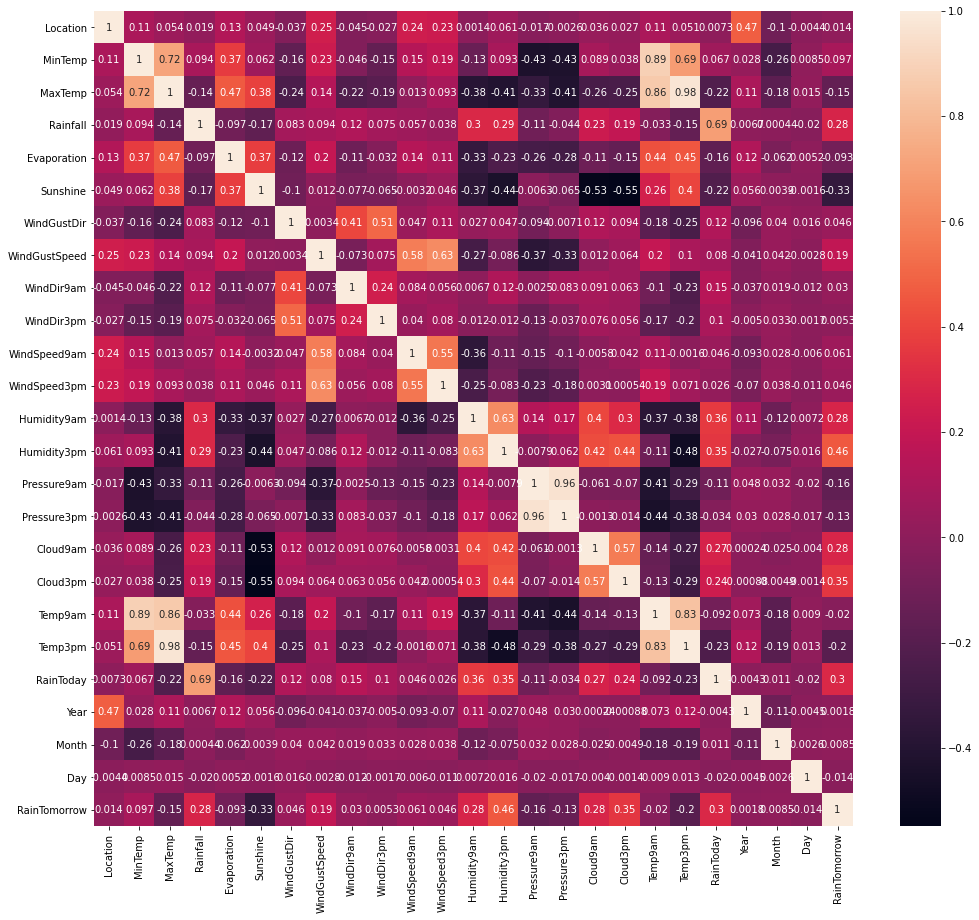

In [59]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Rain Tomorrow Prediction

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [63]:
x_train.shape

(8673, 24)

In [64]:
x_test.shape

(3717, 24)

In [65]:
y_train.shape

(8673,)

In [66]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
adc=AdaBoostClassifier()
gdc=GradientBoostingClassifier()

model=[lr,gnb,svc,dtc,knc,adc,gdc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Predicted result value:',predm)
    print('actual value',y_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Predicted result value: [0 0 0 ... 0 0 1]
actual value 6944     0
5925     0
6183     0
399      0
3944     0
        ..
356      0
11165    1
8069     0
10549    1
10012    1
Name: RainTomorrow, Length: 3717, dtype: int64
0.7968792036588647
[[1522  348]
 [ 407 1440]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1870
           1       0.81      0.78      0.79      1847

    accuracy                           0.80      3717
   macro avg       0.80      0.80      0.80      3717
weighted avg       0.80      0.80      0.80      3717



Predicted result value: [1 0 0 ... 0 0 0]
actual value 6944     0
5925     0
6183     0
399      0
3944     0
        ..
356      0
11165    1
8069     0
10549    1
10012    1
Name: RainTomorrow, Length: 3717, dtype: int64
0.738498789346247
[[1407  463]
 [ 509 1338]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1870
           1       0.74  

From above logistic and classifiers below are the accuracy percentage: logistic 79.68% GaussianNB 73.84% SVC 86.14% DecisionTreeClassifier 86.35% KNeighborsClassifier 86.25%, AdaBoost 83.48% ,GradientBoost 86.49%

So, out of these top three models are GradientBoost, KNN and SVC. we will test CV score to confirm the accuracy score.

Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
svc=SVC()
knc=KNeighborsClassifier()
gdc=GradientBoostingClassifier()

model_cv=[svc,knc,gdc]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=5)
    print(score)
    print (score.mean())
    print (score.std())

[0.64729621 0.63720743 0.75221953 0.81840194 0.82566586]
0.7361581920903955
0.08089663708550583
[0.69612591 0.63841808 0.76634383 0.79661017 0.76876513]
0.7332526230831315
0.05786592858477348
[0.68159806 0.53712672 0.74858757 0.74858757 0.73970944]
0.6911218724778048
0.080957490562698


So, we will select the KNN and Gradient boosting model as their accuracy is highest and will try to tune them.

Hypermeter Tuning

In [71]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_knc={'n_neighbors':[5,10,15]}
param_gdc={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
param_svc={'kernel':['linear','rbf','poly'],'C':[1,10]}

modelknc=KNeighborsClassifier()
modelgdc=GradientBoostingClassifier()
modelsvc=SVC()

In [73]:
gridgdc=GridSearchCV(estimator=modelgdc,param_grid=param_gdc)
gridgdc.fit(x,y)
print(gridgdc)
print(gridgdc.best_score_)
print(gridgdc.best_estimator_)
print(gridgdc.best_params_)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.7214689265536722
GradientBoostingClassifier(learning_rate=0.05)
{'learning_rate': 0.05}


In [74]:
gridknc=GridSearchCV(estimator=modelknc,param_grid=param_knc)
gridknc.fit(x,y)
print(gridknc)
print(gridknc.best_score_)
print(gridknc.best_estimator_)
print(gridknc.best_params_)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15]})
0.7332526230831315
KNeighborsClassifier()
{'n_neighbors': 5}


In [79]:
gridsvc=GridSearchCV(estimator=modelsvc,param_grid=param_svc)
gridsvc.fit(x,y)
print(gridsvc)
print(gridsvc.best_score_)
print(gridsvc.best_estimator_)
print(gridsvc.best_params_)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})
0.773365617433414
SVC(C=10)
{'C': 10, 'kernel': 'rbf'}


In [81]:
svc1=SVC(kernel='rbf')
knc1=KNeighborsClassifier(n_neighbors=5)
gdc1=GradientBoostingClassifier(learning_rate=0.05)

model_cv=[svc1,knc1,gdc1]

for i in model_cv:
    score=cross_val_score(i,x,y,cv=10)
    print(score)
    print (score.mean())
    print (score.std())

[0.75141243 0.63761098 0.60371267 0.84503632 0.84180791 0.84665052
 0.83292978 0.79983858 0.90879742 0.84826473]
0.7916061339790155
0.0936793968659146
[0.75302663 0.73446328 0.62066182 0.79903148 0.84100081 0.86359968
 0.82243745 0.76432607 0.87570621 0.82728006]
0.7901533494753833
0.07188379492883064
[0.77158999 0.66343826 0.58918483 0.82243745 0.78853914 0.78208232
 0.77643261 0.79176755 0.88619855 0.86359968]
0.7735270379338176
0.08363326825330483


So, here our best model comes out to be Support Vector Classifier, so we will save it as svc1 with kernel=rbf and cv=10.

In [ ]:
import pickle
filename='Rainfall_Prediction.pkl'
pickle.dump(svc1, open(filename,'wb'))

# How much Rainfall Prediction

In [87]:
df.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainTomorrow
0,1,13.4,22.9,5.411852,7.689782,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.483177,16.9,21.8,0,2008,12,1,0
1,1,7.4,25.1,5.411852,7.689782,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.528075,4.483177,17.2,24.3,0,2008,12,2,0
2,1,12.9,25.7,5.411852,7.689782,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.528075,2.000000,21.0,23.2,0,2008,12,3,0
3,1,9.2,28.0,5.411852,7.689782,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.528075,4.483177,18.1,26.5,0,2008,12,4,0
4,1,17.5,32.3,5.411852,7.689782,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,2008,12,5,0


In [ ]:
b=df.pop('Rainfall')

In [88]:
df.insert(24,'Rainfall', b)

In [89]:
df.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainTomorrow,Rainfall
0,1,13.4,22.9,5.411852,7.689782,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.483177,16.9,21.8,0,2008,12,1,0,0.6
1,1,7.4,25.1,5.411852,7.689782,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.528075,4.483177,17.2,24.3,0,2008,12,2,0,0.0
2,1,12.9,25.7,5.411852,7.689782,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.528075,2.000000,21.0,23.2,0,2008,12,3,0,0.0
3,1,9.2,28.0,5.411852,7.689782,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.528075,4.483177,18.1,26.5,0,2008,12,4,0,0.0
4,1,17.5,32.3,5.411852,7.689782,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,2008,12,5,0,1.0


In [90]:
x1=df.iloc[:,0:-1]
x1

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainTomorrow
0,1,13.4,22.9,5.411852,7.689782,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.483177,16.9,21.8,0,2008,12,1,0
1,1,7.4,25.1,5.411852,7.689782,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,4.528075,4.483177,17.2,24.3,0,2008,12,2,0
2,1,12.9,25.7,5.411852,7.689782,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,4.528075,2.000000,21.0,23.2,0,2008,12,3,0
3,1,9.2,28.0,5.411852,7.689782,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.528075,4.483177,18.1,26.5,0,2008,12,4,0
4,1,17.5,32.3,5.411852,7.689782,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,2008,12,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,9,3.5,21.8,5.411852,7.689782,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.528075,4.483177,9.4,20.9,0,2017,6,20,0
8420,9,2.8,23.4,5.411852,7.689782,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,4.528075,4.483177,10.1,22.4,0,2017,6,21,0
8421,9,3.6,25.3,5.411852,7.689782,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,4.528075,4.483177,10.9,24.5,0,2017,6,22,0
8422,9,5.4,26.9,5.411852,7.689782,3,37.0,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,4.528075,4.483177,12.5,26.1,0,2017,6,23,0


In [111]:
y1=df.iloc[:,-1]
y1=y1.astype('int')
y1

0       0
1       0
2       0
3       0
4       1
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: Rainfall, Length: 7764, dtype: int64

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings

In [93]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [112]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=.30,random_state=4)

In [113]:
x1_train.shape

(5434, 24)

In [114]:
x1_test.shape

(2330, 24)

In [115]:
y1_train.shape

(5434,)

In [116]:
lr=LinearRegression()
lr.fit(x1_train,y1_train)
lr.score(x1_train,y1_train)

0.4838816504803899

In [117]:
pred=lr.predict(x1_test)
print('Predicted result price:',pred)
print('actual price',y1_test)
print('error:')
print('Mean absolute error:',mean_absolute_error(y1_test,pred))
print('Mean squared error:',mean_squared_error(y1_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,pred)))

Predicted result price: [-0.66063929 -0.09826677  1.02760107 ...  0.00240687 -0.95775818
 -0.15903558]
actual price 168     0
4952    0
1721    0
4641    0
654     0
       ..
2692    0
8132    0
759     0
6819    0
5497    0
Name: Rainfall, Length: 2330, dtype: int64
error:
Mean absolute error: 1.6462098796013747
Mean squared error: 11.77491151249169
Root Mean Squared Error: 3.4314590938100498


In [118]:
print(r2_score(y_test,pred))

0.4735087312734677


In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
ls=Lasso()
rd=Ridge()
enr=ElasticNet()
gnr=GaussianNB()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
adr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()


model=[ls,rd,enr,gnr,svr,dtr,knr,adr,gbr]

for m in model:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm=m.predict(x1_test)
    print('Predicted result value:',predm)
    print('actual value',y1_test)
    print('Mean absolute error:',mean_absolute_error(y1_test,predm))
    print('Mean squared error:',mean_squared_error(y1_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,predm)))
    print('r2_score:',r2_score(y1_test,predm))
    print('\n')

Predicted result value: [ 0.15704525  1.99258609  3.60560273 ... -0.18317142 -1.80027024
  1.23204945]
actual value 168     0
4952    0
1721    0
4641    0
654     0
       ..
2692    0
8132    0
759     0
6819    0
5497    0
Name: Rainfall, Length: 2330, dtype: int64
Mean absolute error: 2.3668968713138705
Mean squared error: 17.448672487223263
Root Mean Squared Error: 4.177160816538342
r2_score: 0.18151116567815062


Predicted result value: [-0.6607382  -0.09566419  1.03346765 ...  0.00248332 -0.95843867
 -0.15682611]
actual value 168     0
4952    0
1721    0
4641    0
654     0
       ..
2692    0
8132    0
759     0
6819    0
5497    0
Name: Rainfall, Length: 2330, dtype: int64
Mean absolute error: 1.646278458297872
Mean squared error: 11.773491506605483
Root Mean Squared Error: 3.431252177646738
r2_score: 0.4477246709630207


Predicted result value: [-0.33381478  2.04560821  3.81683869 ... -0.10602566 -1.77616997
  1.18845322]
actual value 168     0
4952    0
1721    0
4641    0


So, gradientboost is the best model with score of 52.57. We will chosse this model

Hypermeter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
param_gbr={'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
modelgbr=GradientBoostingRegressor()

In [124]:
gridgbr=GridSearchCV(estimator=modelgbr,param_grid=param_gbr)
gridgbr.fit(x1,y1)
print(gridgbr)
print(gridgbr.best_score_)
print(gridgbr.best_estimator_)
print(gridgbr.best_params_)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1]})
0.49459274840912365
GradientBoostingRegressor(learning_rate=0.05)
{'learning_rate': 0.05}


In [126]:
gbr1=GradientBoostingRegressor(learning_rate=0.05)

model1=[gbr1]

for m in model1:
    m.fit(x1_train,y1_train)
    m.score(x1_train,y1_train)
    predm=m.predict(x1_test)
    print('Predicted result value:',predm)
    print('actual value',y1_test)
    print('Mean absolute error:',mean_absolute_error(y1_test,predm))
    print('Mean squared error:',mean_squared_error(y1_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,predm)))
    print('r2_score:',r2_score(y1_test,predm))
    print('\n')

Predicted result value: [ 0.02873304  0.14086827  0.05490091 ...  0.08575285  0.09371511
 -0.01339836]
actual value 168     0
4952    0
1721    0
4641    0
654     0
       ..
2692    0
8132    0
759     0
6819    0
5497    0
Name: Rainfall, Length: 2330, dtype: int64
Mean absolute error: 1.3162277216989562
Mean squared error: 10.37076934074469
Root Mean Squared Error: 3.2203678890376315
r2_score: 0.5135240852882951




In [127]:
import pickle
filename='Rainfall_Prediction.pkl'
pickle.dump(gbr1, open(filename,'wb'))